In [8]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV

In [9]:
data=pd.read_csv('Social_Network_Ads.csv')
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [31]:
data.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [32]:
data['Gender'].replace({'Male':0,'Female':1},inplace=True)

In [35]:
X=data.iloc[:, 1:4]
y=data.iloc[:,-1]

In [36]:
X.shape

(400, 3)

In [37]:
y.shape

(400,)

In [38]:
dt=DecisionTreeClassifier()

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [40]:
X_train.columns

Index(['Gender', 'Age', 'EstimatedSalary'], dtype='object')

In [41]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [42]:
dt.predict(X_test)

array([1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0])

In [43]:
dt.score(X_test,y_test)

0.8375

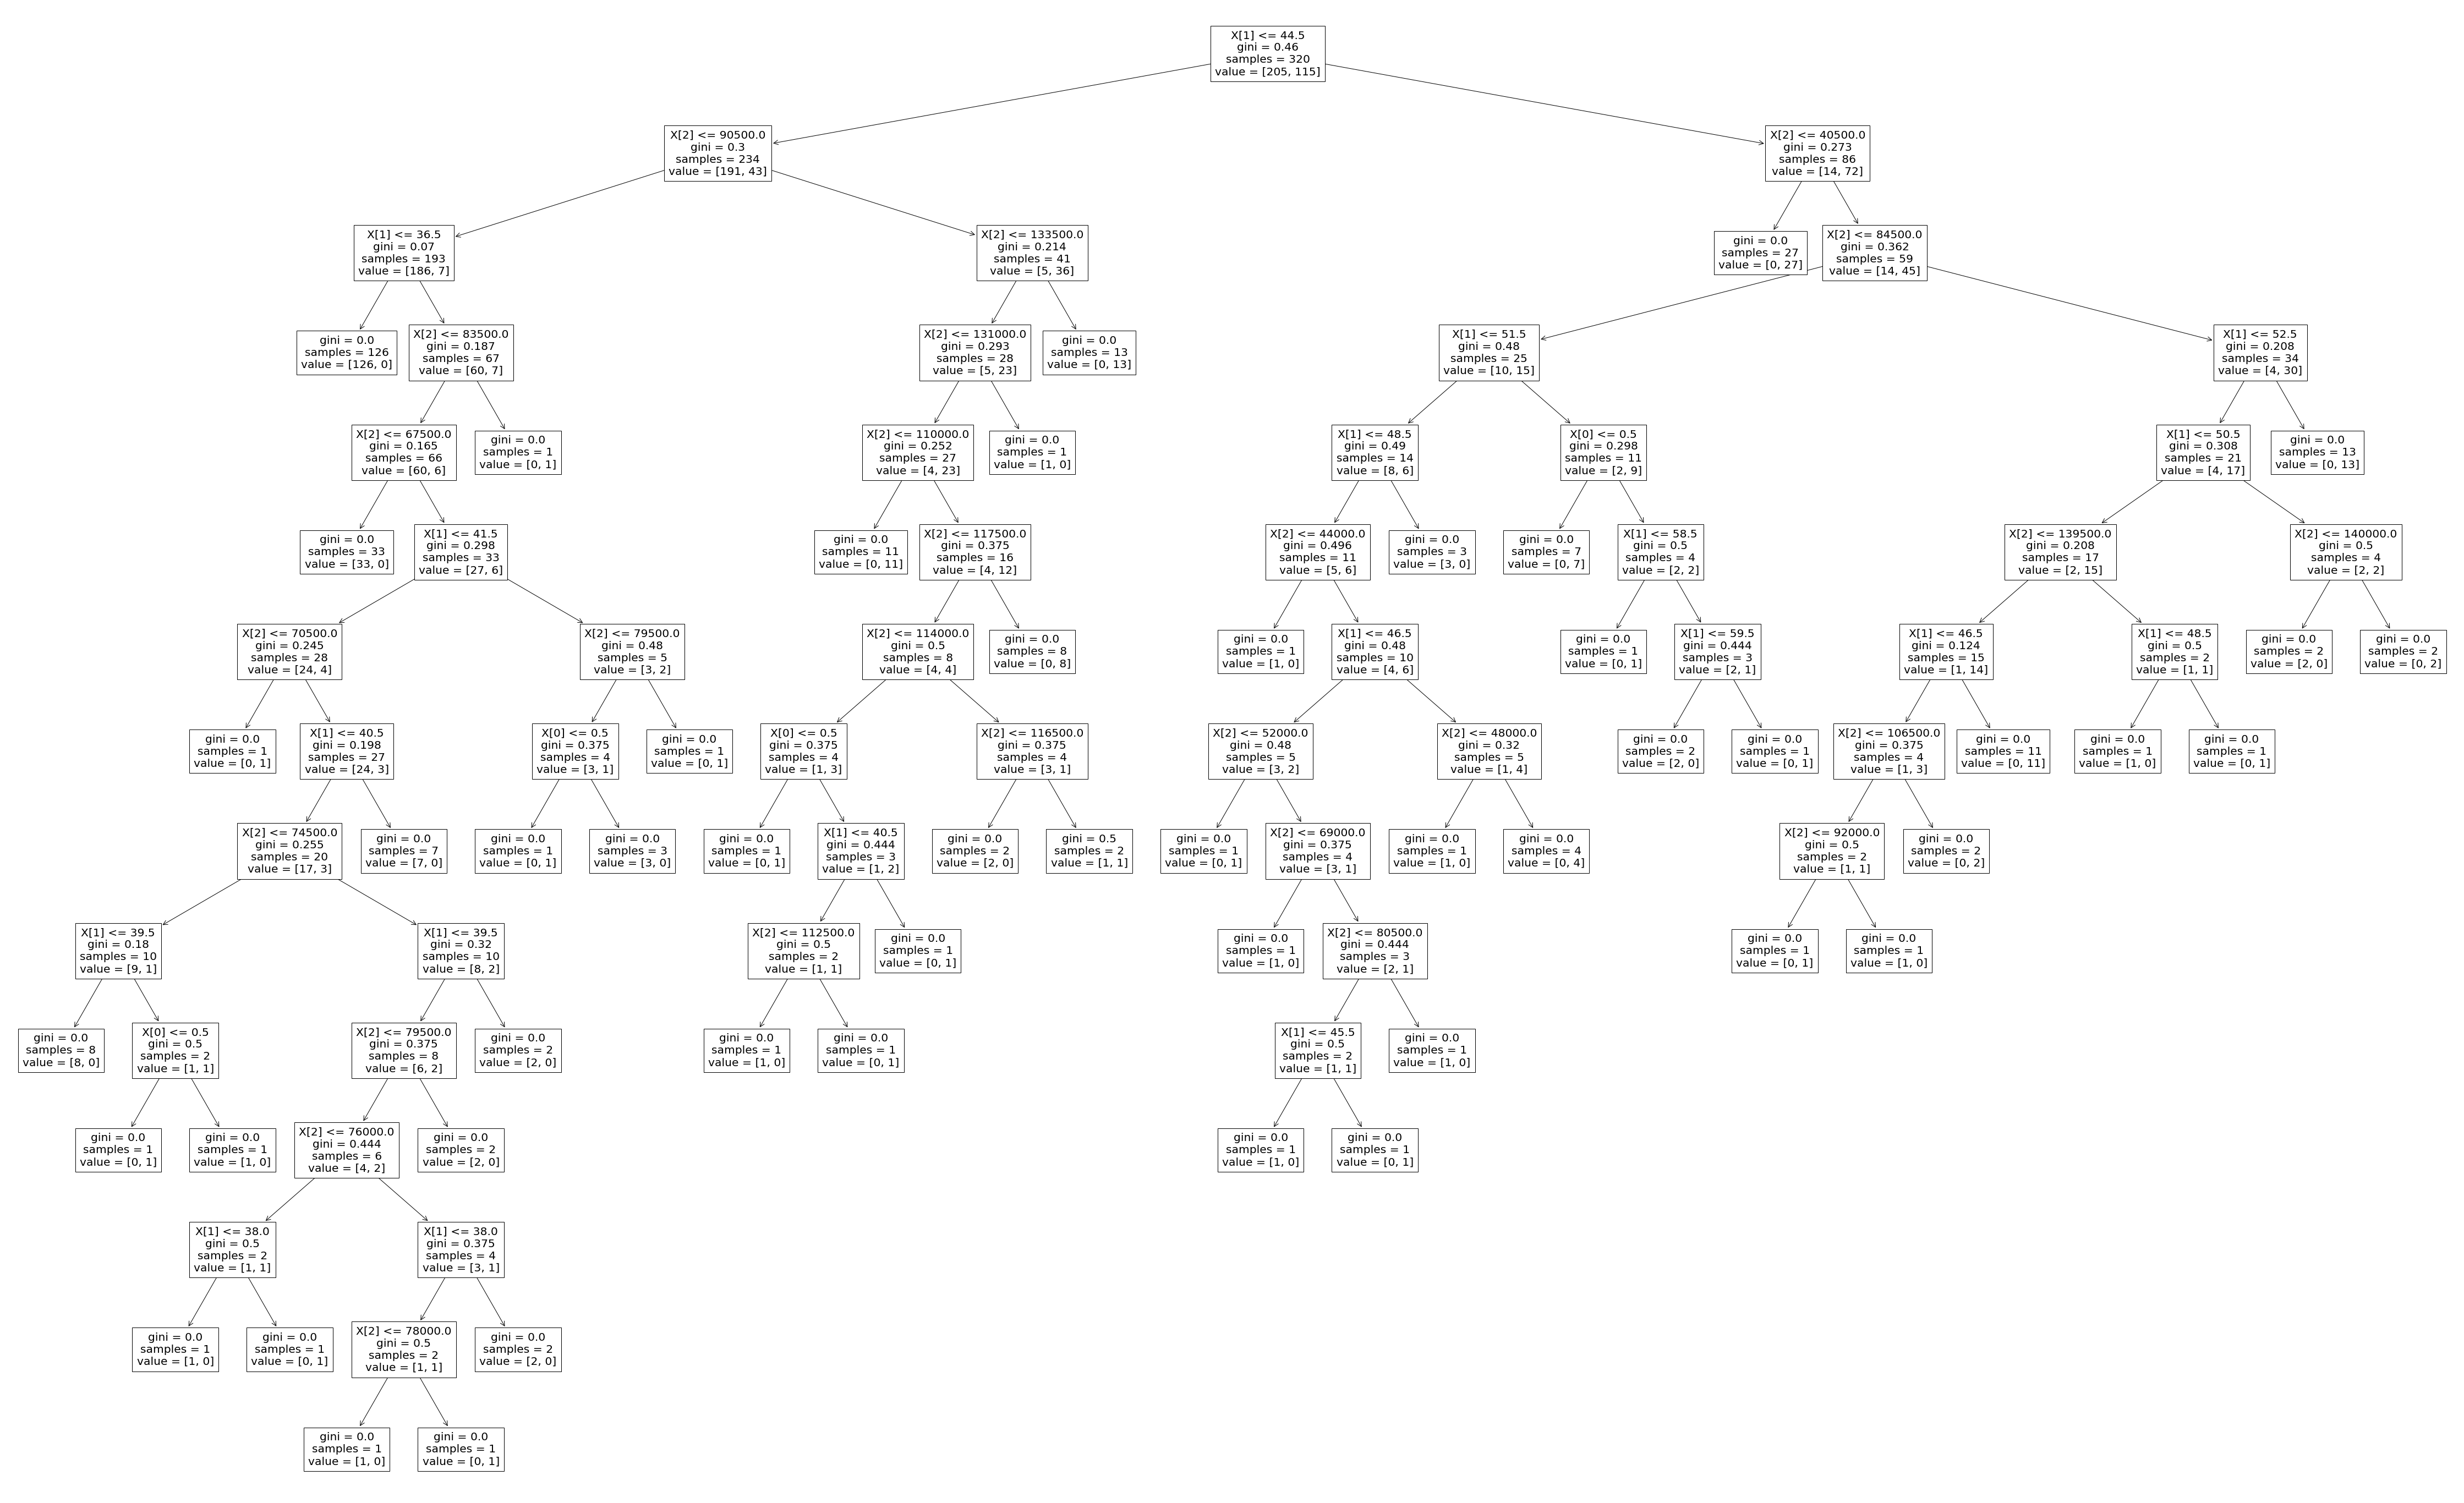

In [44]:
from sklearn.tree import plot_tree

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 80,50

plot_tree(dt)
rcParams['figure.figsize'] = 80,50

In [45]:
param_grid={
    'max_depth':[2,5,8,10,None],
    'criterion':['gini','entropy'],
    'max_features':[0.25,0.5,1.0],
    'min_samples_split':[0.25,0.5,1.0]
    
}

In [46]:
reg=GridSearchCV(DecisionTreeClassifier(),param_grid=param_grid)

In [47]:
reg.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 5, 8, 10, None],
                         'max_features': [0.25, 0.5, 1.0],
                         'min_samples_split': [0.25, 0.5, 1.0]})

In [48]:
reg.best_score_

0.9

In [49]:
reg.best_params_

{'criterion': 'gini',
 'max_depth': 2,
 'max_features': 1.0,
 'min_samples_split': 0.25}

## Feature Importance

In [50]:
for importance,name in sorted(zip(dt.feature_importances_,X_train.columns),reverse=True):
    print(name,importance)

EstimatedSalary 0.5066674992547294
Age 0.46641372943188053
Gender 0.02691877131339015
